<a href="https://colab.research.google.com/github/jambinoid/convolution_networks/blob/master/Conv_pool_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация работы слоев

Сверточный слой + функция активации, за которым следует объединяющий слой, и линейный слой (для создания желаемого выходного размера) составляют основные слои CNN.


### Импорт картинок

--2020-07-23 10:29:57--  https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97048 (95K) [image/jpeg]
Saving to: ‘crocodile-3687036__480.jpg’

crocodile-3687036__ 100%[===================>]  94.77K  --.-KB/s    in 0.02s   

2020-07-23 10:29:57 (5.54 MB/s) - ‘crocodile-3687036__480.jpg’ saved [97048/97048]



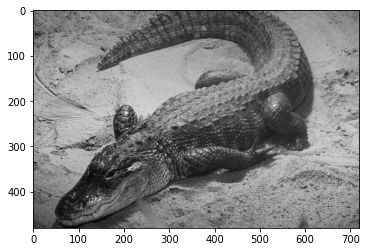

In [ ]:
import cv2
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

img_url = 'https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg'

!wget $img_url

img_path = 'crocodile-3687036__480.jpg'

# загружаем цветную картинку
bgr_img = cv2.imread(img_path)
# конвертируем в grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# нормализуем входы, чтоб лежали в промежутке [0,1]
gray_img = gray_img.astype("float32")/255

plt.imshow(gray_img, cmap='gray')
plt.show()

### Define and visualize the filters

In [ ]:
import numpy as np

## пожете попробовать поменят ьзначения в фильтре, что б сравнить результаты
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [ ]:
# Создаем 4 разных фильтра, созданных на основе filter_vals

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]



### Свертки

В данном примере инициализируется один сверточный слой так, чтобы он содержал все созданные фильтры. Обратите внимание, что вы не тренируете эту сеть; вы инициализируете веса в сверточном слое, чтобы вы могли визуализировать, что происходит после прямого прохождения через эту сеть!


#### `__init__` и `forward`
Чтобы задать архитектуру нейронной сети в PyTorch, определяются слои модели в функции '_ _ init_ _'. Прямое поведение сети, которая применяет эти инициализированные слои ко входу (`x`) в функции `forward`.

### Слой pooling 

После добавления фильтров в сверточные слои, добавляем максимальный слой пула, с размером ядра (2x2).



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# задаем нейронную сеть со свертами с 4 фильтрами
# и слой пулинга (2, 2)
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # инициализирует веса сверточного слоя
        k_height, k_width = weight.shape[2:]
        # указываем, что существует 4 фильтра оттенков серого
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width))
        self.conv.weight = torch.nn.Parameter(weight)
        # задаем pooling слой
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # считаем выход свертки
        # применяем активацию
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # приминяем pooling слой
        pooled_x = self.pool(activated_x)
        
        # возвращаем все слои
        return conv_x, activated_x, pooled_x
    
# создайте экземпляр модели и установите веса
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### Визуализация выхода каждого фильтра

Функция "viz_layer" принимает определенный слой и количество фильтров (необязательный аргумент) и отображает выходные данные этого слоя после прохождения изображения.

In [ ]:

def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)

        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Давайте посмотрим на выход сверточного слоя после применения функции активации ReLu.

#### ReLu


Функция ReLu превращает все отрицательные значения пикселей в 0 (черный цвет).

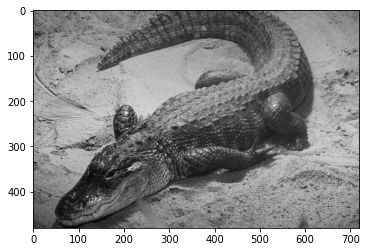

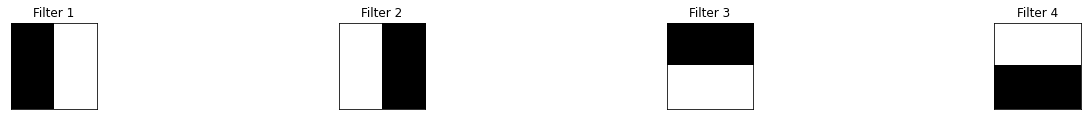

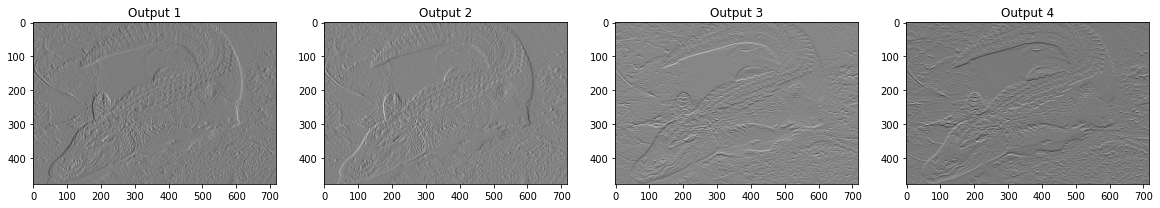

In [ ]:
plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# конвертируем изображение в Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# получаем все слои 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

viz_layer(conv_layer) # свертки

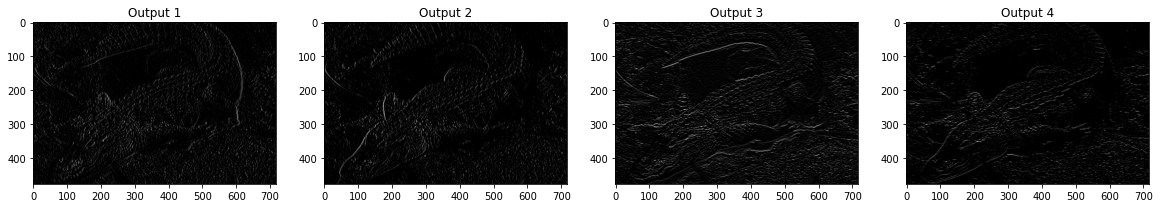

In [ ]:
viz_layer(activated_layer)

### Слой pooling

Слой pooling принимает в качестве входных данных карты объектов, изображенные выше, и уменьшает размерность этих карт на некоторый коэффициент объединения, создавая новое, меньшее изображение только максимальных (самых ярких) значений в данной области ядра.

Взгляните на значения по осям x, y, чтобы увидеть, как изменился размер изображения.


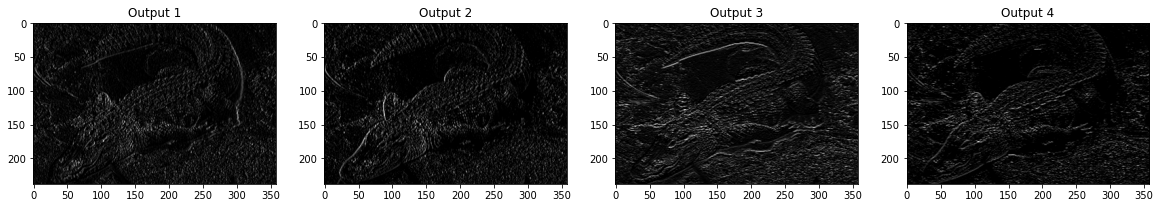

In [ ]:
viz_layer(pooled_layer)
